In [128]:
import pandas as pd
import requests
import os

df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = 'pred'
response = requests.get(url)

if not os.path.exists(folder_name):
    os.makedirs(folder_name)


with open(os.path.join(folder_name, url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

In [130]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [131]:
df3 = pd.read_json('tweet-json.txt',lines=True)

In [132]:
print(df1.shape)

(2356, 17)


In [133]:
print(df2.shape)

(2075, 12)


In [134]:
print(df3.shape)

(2354, 31)


In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [136]:
df1mod = df1[pd.isnull(df1['retweeted_status_id'])]
df1mod = df1mod.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_user_id','in_reply_to_status_id','expanded_urls'])

In [137]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [138]:
df1mod = df1mod.reset_index()

In [139]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
index                 2175 non-null int64
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(4), object(8)
memory usage: 204.0+ KB


In [140]:
df1mod['rating_numerator'].value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [141]:
df1mod = df1mod.query('rating_numerator >= 0 & rating_numerator <= 20')

In [142]:
df1mod['rating_numerator'].value_counts()

12    500
10    442
11    426
13    307
9     156
8      98
7      54
14     43
5      36
6      32
3      19
4      17
2       9
1       8
0       2
17      1
15      1
20      1
Name: rating_numerator, dtype: int64

In [143]:
df1mod['rating_denominator'].value_counts()

10    2145
11       2
20       2
15       1
16       1
2        1
Name: rating_denominator, dtype: int64

In [144]:
df1mod = df1mod.query('rating_denominator == 10')

In [145]:
df1mod['rating_denominator'].value_counts()

10    2145
Name: rating_denominator, dtype: int64

In [146]:
df1mod['name'].value_counts()

None          659
a              54
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
the             8
Sadie           8
Lola            8
Toby            7
Daisy           7
Bella           6
Oscar           6
Koda            6
Jax             6
Bailey          6
Stanley         6
Bo              6
Milo            5
Dave            5
Chester         5
Buddy           5
an              5
Rusty           5
Scout           5
Bentley         5
Leo             5
             ... 
Brandy          1
Maks            1
Poppy           1
Noosh           1
Glacier         1
Trip            1
Callie          1
Rodman          1
such            1
Socks           1
Dewey           1
Loomis          1
Furzey          1
Tito            1
Ralpher         1
Grady           1
Bertson         1
Skye            1
Nida            1
Terrenth        1
Karma           1
William         1
Leonard         1
Saydee          1
Lizzie    

In [147]:
df1mod = df1mod[df1mod['name'] != 'None']

In [148]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 0 to 2173
Data columns (total 12 columns):
index                 1486 non-null int64
tweet_id              1486 non-null int64
timestamp             1486 non-null object
source                1486 non-null object
text                  1486 non-null object
rating_numerator      1486 non-null int64
rating_denominator    1486 non-null int64
name                  1486 non-null object
doggo                 1486 non-null object
floofer               1486 non-null object
pupper                1486 non-null object
puppo                 1486 non-null object
dtypes: int64(4), object(8)
memory usage: 150.9+ KB


In [149]:
df1mod['doggo'].value_counts()

None     1441
doggo      45
Name: doggo, dtype: int64

In [150]:
df1mod['floofer'].value_counts()

None       1481
floofer       5
Name: floofer, dtype: int64

In [151]:
df1mod['pupper'].value_counts()

None      1350
pupper     136
Name: pupper, dtype: int64

In [152]:
df1mod['puppo'].value_counts()

None     1470
puppo      16
Name: puppo, dtype: int64

In [153]:
df1mod = df1mod.replace({'doggo': {'doggo': True, 'None': False}})

In [154]:
df1mod = df1mod.replace({'floofer': {'floofer': True, 'None': False}})

In [155]:
df1mod = df1mod.replace({'pupper': {'pupper': True, 'None': False}})

In [156]:
df1mod = df1mod.replace({'puppo': {'puppo': True, 'None': False}})

In [157]:
df1mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 0 to 2173
Data columns (total 12 columns):
index                 1486 non-null int64
tweet_id              1486 non-null int64
timestamp             1486 non-null object
source                1486 non-null object
text                  1486 non-null object
rating_numerator      1486 non-null int64
rating_denominator    1486 non-null int64
name                  1486 non-null object
doggo                 1486 non-null bool
floofer               1486 non-null bool
pupper                1486 non-null bool
puppo                 1486 non-null bool
dtypes: bool(4), int64(4), object(4)
memory usage: 110.3+ KB


In [158]:
df3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [159]:
df1mod = df1mod.reset_index()

In [160]:
df1mod = df1mod.drop(columns=['level_0'])

In [161]:
df1mod.head()

,index,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,False,False,False,False
1,1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,False,False,False,False
2,2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,False,False,False,False
3,3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,False,False,False,False
4,4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,False,False,False,False


In [162]:
df3mod = df3.filter(['favorite_count','retweet_count','full_text'])

In [164]:
df3mod.head()

,favorite_count,retweet_count,full_text
0,39467,8853,This is Phineas. He's a mystical boy. Only eve...
1,33819,6514,This is Tilly. She's just checking pup on you....
2,25461,4328,This is Archie. He is a rare Norwegian Pouncin...
3,42908,8964,This is Darla. She commenced a snooze mid meal...
4,41048,9774,This is Franklin. He would like you to stop ca...


In [165]:
df3mod = df3mod.rename(columns={"full_text": "text"})

In [166]:
dftemp = pd.merge(df1mod, df3mod, on='text')

In [167]:
dftemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 0 to 1485
Data columns (total 14 columns):
index                 1486 non-null int64
tweet_id              1486 non-null int64
timestamp             1486 non-null object
source                1486 non-null object
text                  1486 non-null object
rating_numerator      1486 non-null int64
rating_denominator    1486 non-null int64
name                  1486 non-null object
doggo                 1486 non-null bool
floofer               1486 non-null bool
pupper                1486 non-null bool
puppo                 1486 non-null bool
favorite_count        1486 non-null int64
retweet_count         1486 non-null int64
dtypes: bool(4), int64(6), object(4)
memory usage: 133.5+ KB


In [168]:
dftemp.head()

,index,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,False,False,False,False,39467,8853
1,1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,False,False,False,False,33819,6514
2,2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,False,False,False,False,25461,4328
3,3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,False,False,False,False,42908,8964
4,4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,False,False,False,False,41048,9774


In [169]:
dftemp = dftemp.drop(columns=['index'])

In [170]:
df2.head(9)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


In [171]:
dffinal = pd.merge(dftemp, df2, on='tweet_id')

In [172]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1438
Data columns (total 24 columns):
tweet_id              1439 non-null int64
timestamp             1439 non-null object
source                1439 non-null object
text                  1439 non-null object
rating_numerator      1439 non-null int64
rating_denominator    1439 non-null int64
name                  1439 non-null object
doggo                 1439 non-null bool
floofer               1439 non-null bool
pupper                1439 non-null bool
puppo                 1439 non-null bool
favorite_count        1439 non-null int64
retweet_count         1439 non-null int64
jpg_url               1439 non-null object
img_num               1439 non-null int64
p1                    1439 non-null object
p1_conf               1439 non-null float64
p1_dog                1439 non-null bool
p2                    1439 non-null object
p2_conf               1439 non-null float64
p2_dog                1439 non-null bool
p3    

In [173]:
dffinal['timestamp'] =  pd.to_datetime(dffinal['timestamp'])

In [174]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1438
Data columns (total 24 columns):
tweet_id              1439 non-null int64
timestamp             1439 non-null datetime64[ns]
source                1439 non-null object
text                  1439 non-null object
rating_numerator      1439 non-null int64
rating_denominator    1439 non-null int64
name                  1439 non-null object
doggo                 1439 non-null bool
floofer               1439 non-null bool
pupper                1439 non-null bool
puppo                 1439 non-null bool
favorite_count        1439 non-null int64
retweet_count         1439 non-null int64
jpg_url               1439 non-null object
img_num               1439 non-null int64
p1                    1439 non-null object
p1_conf               1439 non-null float64
p1_dog                1439 non-null bool
p2                    1439 non-null object
p2_conf               1439 non-null float64
p2_dog                1439 non-null boo

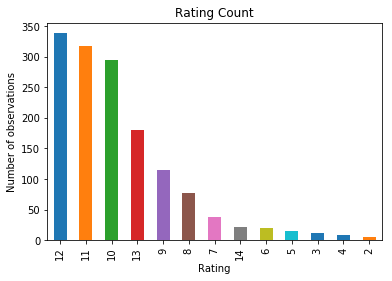

In [175]:

ax = dffinal['rating_numerator'].value_counts().plot(kind='bar',title='Rating Count')
ax.set_ylabel('Number of observations')
ax.set_xlabel('Rating')
plt.show();

In [176]:
dffinal.nlargest(5,'favorite_count')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
48,879415818425184262,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,False,False,False,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
322,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,False,False,False,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
88,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,False,False,True,...,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
268,819004803107983360,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,14,10,Bo,True,False,False,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
76,870374049280663552,2017-06-01 20:18:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,13,10,Zoey,False,False,False,...,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True


In [177]:
dffinal.nlargest(5,'retweet_count')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
322,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,False,False,False,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
48,879415818425184262,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,False,False,False,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
268,819004803107983360,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,14,10,Bo,True,False,False,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
88,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,False,False,True,...,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
1103,676219687039057920,2015-12-14 01:58:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,10,10,Kenneth,False,False,False,...,1,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True


In [178]:
dffinal.nsmallest(5,'favorite_count')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1424,666447344410484738,2015-11-17 02:46:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,9,10,Scout,False,False,False,...,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
1427,666407126856765440,2015-11-17 00:06:54,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,7,10,a,False,False,False,...,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True
1431,666058600524156928,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,8,10,the,False,False,False,...,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
1437,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,False,False,False,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1425,666418789513326592,2015-11-17 00:53:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,10,10,Walter,False,False,False,...,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True


In [179]:
dffinal.nsmallest(5,'retweet_count')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1424,666447344410484738,2015-11-17 02:46:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,9,10,Scout,False,False,False,...,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
1427,666407126856765440,2015-11-17 00:06:54,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,7,10,a,False,False,False,...,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True
1274,670676092097810432,2015-11-28 18:50:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloo. He's a Westminster Cîroc. Doesn'...,8,10,Bloo,False,False,False,...,1,Dandie_Dinmont,0.676102,True,West_Highland_white_terrier,0.040826,True,clumber,0.039533,True
1356,668620235289837568,2015-11-23 02:41:01,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kallie. There was a tornado in th...,10,10,Kallie,False,False,False,...,1,crash_helmet,0.757942,False,toaster,0.037497,False,mouse,0.027271,False
1437,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,False,False,False,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [194]:
pruba = dffinal.query('p1_conf >= 0.8 & p1_dog == True')

In [195]:
pruba['p1'].value_counts()

golden_retriever                  44
Pembroke                          30
pug                               24
Labrador_retriever                22
Samoyed                           17
Pomeranian                        17
chow                              14
Chihuahua                         14
French_bulldog                    13
German_shepherd                    8
Chesapeake_Bay_retriever           7
toy_poodle                         7
miniature_pinscher                 5
Shetland_sheepdog                  5
Shih-Tzu                           5
basset                             5
vizsla                             5
Blenheim_spaniel                   5
malamute                           5
Brittany_spaniel                   5
Pekinese                           4
American_Staffordshire_terrier     4
Bernese_mountain_dog               4
boxer                              3
dalmatian                          3
Doberman                           3
cocker_spaniel                     3
O

In [180]:
dffinal.to_csv('twitter_archive_master.csv', index=False)

In [181]:
from sqlalchemy import create_engine

In [183]:
engine = create_engine('sqlite:///twitter_archive_master.db')
dffinal.to_sql('master', engine, index=False)